In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datacon-22/Processed_data/bookings.csv
/kaggle/input/datacon-22/Processed_data/hotels_data.csv
/kaggle/input/datacon-22/Processed_data/bookings_data.csv
/kaggle/input/datacon-22/Processed_data/train_data.csv
/kaggle/input/datacon-22/Processed_data/customer_data.csv
/kaggle/input/datacon-22/Processed_data/sample_submission_5.csv
/kaggle/input/datacon-22/Processed_data/payments_data.csv


In [2]:
bookings = pd.read_csv('/kaggle/input/datacon-22/Processed_data/bookings.csv')
sample_submission = pd.read_csv('/kaggle/input/datacon-22/Processed_data/sample_submission_5.csv')
hotels_data = pd.read_csv('/kaggle/input/datacon-22/Processed_data/hotels_data.csv')
bookings_data = pd.read_csv('/kaggle/input/datacon-22/Processed_data/bookings_data.csv')
train_data = pd.read_csv('/kaggle/input/datacon-22/Processed_data/train_data.csv')
customer_data = pd.read_csv('/kaggle/input/datacon-22/Processed_data/customer_data.csv')
payments_data = pd.read_csv('/kaggle/input/datacon-22/Processed_data/payments_data.csv')

### Train Data

In [3]:
train_data.head()

,booking_id,rating_score
0,87114b39712e6da79b0a377eb73fc7af,4
1,81e283fa7e4f11123a3fb894f18e6bfb,5
2,6530bb5ed4a7648915306a63d374c9e4,5
3,5f95d01e79bd1349cc208361f099d6f1,4
4,d871cd5c22b83b5ea8f6e0e2eaf8e099,4


In [4]:
train_data.shape

(50000, 2)

### Bookings

In [5]:
bookings.head()

,booking_id,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date
0,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13
1,c7dce0b6741e215027345153cdb2fc8b,7a6c6d20dea0b8c802d7efb0830fb474,completed,2008-07-26 20:24:37,2008-07-28 03:07:27,2008-08-09 15:10:45
2,d0c44946d9cf07ec65d47770eb9100c2,bf3443c3d931a36708941ce2a54c0b03,completed,2008-08-10 08:21:49,2008-08-10 08:38:23,2008-08-19 17:49:29
3,e918fe9c16f97b45f8a949d5b44dbf5d,20adcdbec7375364d82f88197465ea79,completed,2007-11-21 19:11:06,2007-11-21 19:28:59,2007-12-05 00:11:42
4,e6cb83a9ceb5573f8159ad21c59c0840,ea8866dbdbc4fb7aad2c8ab97904e6da,completed,2008-02-16 21:01:39,2008-02-16 22:03:29,2008-02-19 18:00:02


In [6]:
bookings.shape

(99441, 6)

In [7]:
len(np.unique(bookings['booking_id'])), len(np.unique(bookings['customer_id']))

(99441, 99441)

**What???** All booking ids are unique?

### Customer Data

In [8]:
customer_data.head()

,customer_id,customer_unique_id,country
0,1fbc88172c00ba8bc706b8999e2fba1a,a542e4b93843c6dd7febb0861eff4711,Portugal
1,e83d337fd6b2def6b18a428ac7718955,9b7ac935b93aa66c333dc3290c77bc52,Japan
2,586ebd08712fdd0374a034e7b3e00288,8181a18229c7b0b2b5e060e732b5b29e,Portugal
3,c5c5109e529d4dc6358b12c3b2b6027b,24d7702b9acbbff3f3c259dac757896d,USA
4,1c80ec8364f7c12e35b23ad4f2d8ab17,18a9036ed96c73b8d066345ecd01c38d,Slovakia


In [9]:
customer_data.shape

(99441, 3)

In [10]:
len(np.unique(customer_data['customer_id'])), len(np.unique(customer_data['customer_unique_id']))

(99441, 96096)

In [11]:
# grouped_cust_data = customer_data.groupby(by = 'customer_id')['country'].agg(['min', 'max'])
grouped_cust_data = customer_data.groupby(by = 'customer_id')['country'].agg([pd.Series.mode])
grouped_cust_data

,mode
customer_id,
00006561d29870872c98879612677b83,USA
00017e0177378ddef1c9c757fe719dc4,Vietnam
000210bb0d5abb62fdeecee078e99036,USA
00022ba7bbeb4918104c3e4b0745edd0,USA
0002823449d52e6d6f951e27003e2be8,Japan
...,...
fffd24b2bc8a3745db299d01f5fc62b1,UK
fffe505ee892e153a2fbd49ba0660bf3,USA
fffe770d51b0b75c3e0994068ce84281,USA


In [12]:
# ['USA', 'Slovakia'].min()

In [13]:
grouped_cust_data_df = grouped_cust_data.reset_index()
grouped_cust_data_df

,customer_id,mode
0,00006561d29870872c98879612677b83,USA
1,00017e0177378ddef1c9c757fe719dc4,Vietnam
2,000210bb0d5abb62fdeecee078e99036,USA
3,00022ba7bbeb4918104c3e4b0745edd0,USA
4,0002823449d52e6d6f951e27003e2be8,Japan
...,...,...
99436,fffd24b2bc8a3745db299d01f5fc62b1,UK
99437,fffe505ee892e153a2fbd49ba0660bf3,USA
99438,fffe770d51b0b75c3e0994068ce84281,USA
99439,fffea84c408569acad1def536ba4f866,Russia


In [14]:
grouped_cust_data_df.columns = ['customer_id', 'country']
grouped_cust_data_df

,customer_id,country
0,00006561d29870872c98879612677b83,USA
1,00017e0177378ddef1c9c757fe719dc4,Vietnam
2,000210bb0d5abb62fdeecee078e99036,USA
3,00022ba7bbeb4918104c3e4b0745edd0,USA
4,0002823449d52e6d6f951e27003e2be8,Japan
...,...,...
99436,fffd24b2bc8a3745db299d01f5fc62b1,UK
99437,fffe505ee892e153a2fbd49ba0660bf3,USA
99438,fffe770d51b0b75c3e0994068ce84281,USA
99439,fffea84c408569acad1def536ba4f866,Russia


In [15]:
# (grouped_cust_data_df['min'] == grouped_cust_data_df['max']).sum()

 *ignore* Haha all customer ids (even if multiple mapping wale) are assigned one country only. So directly customer id se country extract kar sakte hai

**get the unique country for each customer id**

In [16]:
# v = customer_data['customer_unique_id'].value_counts()
# v

In [17]:
# multiple_cust_ids_wale_cust = customer_data[customer_data['customer_unique_id'].isin(v.index[v.gt(1)])]
# multiple_cust_ids_wale_cust

In [18]:
# multiple_cust_ids_wale_cust[multiple_cust_ids_wale_cust['customer_id'] == 'f50201ccdcedfb9e2ac84558d50f5ead']

In [19]:
# multiple_cust_ids_wale_cust.loc[multiple_cust_ids_wale_cust['customer_id'] == 'f50201ccdcedfb9e2ac84558d50f5ead']

In [20]:
# multiple_cust_ids_wale_cust.sort_values(by=['customer_id'])

### Combine grouped_data_cust with booking id (on cust_id column). Because cust_id column aur kahi nahi hai, bas inn dono me

In [21]:
bookings_customer_data_unqiue_for_each_id = pd.merge(bookings, grouped_cust_data_df, on = 'customer_id', how = 'left')
bookings_customer_data_unqiue_for_each_id.head()

,booking_id,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country
0,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13,Vietnam
1,c7dce0b6741e215027345153cdb2fc8b,7a6c6d20dea0b8c802d7efb0830fb474,completed,2008-07-26 20:24:37,2008-07-28 03:07:27,2008-08-09 15:10:45,Portugal
2,d0c44946d9cf07ec65d47770eb9100c2,bf3443c3d931a36708941ce2a54c0b03,completed,2008-08-10 08:21:49,2008-08-10 08:38:23,2008-08-19 17:49:29,Portugal
3,e918fe9c16f97b45f8a949d5b44dbf5d,20adcdbec7375364d82f88197465ea79,completed,2007-11-21 19:11:06,2007-11-21 19:28:59,2007-12-05 00:11:42,Portugal
4,e6cb83a9ceb5573f8159ad21c59c0840,ea8866dbdbc4fb7aad2c8ab97904e6da,completed,2008-02-16 21:01:39,2008-02-16 22:03:29,2008-02-19 18:00:02,Spain


### Hotels data

In [22]:
hotels_data

,hotel_id,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty
0,4dbcff4541ed26657ea517e51e9e8ef0,65.0,40.0,287.0,1.0
1,1139cb16b67ca9e5dea641aaa2f3aa07,72.0,44.0,276.0,1.0
2,c8810374ed1b65e291975717f96bd76e,69.0,46.0,250.0,1.0
3,66a932b7673e239eb23dcef67bcfe190,18.0,27.0,261.0,1.0
4,74444849c219cff195d0b719dc1a7de2,11.0,37.0,402.0,4.0
...,...,...,...,...,...
32946,cda646f2d34e418fff5a0a0b7d5a992c,6.0,45.0,67.0,2.0
32947,d0fd4412a93c974510e6bf4538d88321,67.0,41.0,971.0,1.0
32948,92d9d9ef6cfe62a71f8c9a7c6041fa95,28.0,50.0,799.0,1.0
32949,a22e264b9d75f04a2e83808703fc0706,2.0,60.0,156.0,2.0


In [23]:
len(np.unique(hotels_data['hotel_id']))

32951

### Bookings Data

In [24]:
# select only those booking ids which are in train and test set
# drop others

# all_booking_ids = list(train_data['booking_id']) + list(sample_submission['booking_id'])
# # print(all_booking_ids[:10])
# print(f'number of all such ids =  {len(all_booking_ids)}')

# # all booking ids which are not in training and testing set
# drop_ids = bookings_data[~bookings_data['booking_id'].isin(all_booking_ids)]

# ids_to_be_dropped = drop_ids['booking_id'].values.tolist()

# bookings_data = bookings_data[~bookings_data['booking_id'].isin(ids_to_be_dropped)]
# bookings_data

**now we only have rows which are useful**

In [25]:
bookings_data.head()

,booking_id,booking_sequence_id,hotel_id,seller_agent_id,booking_expiry_date,price,agent_fees
0,242fe8c5a6d1ba2dd792cb1621400010,1,e7ecb4970a6e2683c13e614244733e06,8ac8b2bce089ec2a04120248436dade1,2017-09-19 09:45:35,58.90,13.29
1,f77f2f0320c557190d7a144bdd300018,1,2189ee658865ca93d83a8fe5f2d52b80,b6c2c614352b383efe2d36dd7ddc04e1,2017-05-03 11:05:13,239.90,19.93
2,98224ef6ca0657da4fc703e000229ec3,1,b67abbeef9df44fd0fdc777355d18b72,2adc84c38acab88f23d5b51032eddd24,2018-01-18 14:48:30,199.00,17.87
3,cdf0a6daa1e931b038114c7500024acb,1,0f1595efa32f14722fc7634da152a461,409006425275ba1c2b49d7a1d34a5052,2018-08-15 10:10:18,12.99,12.79
4,26cf59d7ce69dfabb4e55b4fd900042b,1,30de03045865e4e10089ac6c3623068f,1e74553ab94004ba5c87df560393f3a5,2017-02-13 13:57:51,199.90,18.14


In [26]:
bookings_data.shape

(112650, 7)

#### Look at hotel id (kyuki hotels data alag se dataframe given hai)

In [27]:
# bookings_data[['booking_id', 'hotel_id']]

In [28]:
hotels_data.head()

,hotel_id,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty
0,4dbcff4541ed26657ea517e51e9e8ef0,65.0,40.0,287.0,1.0
1,1139cb16b67ca9e5dea641aaa2f3aa07,72.0,44.0,276.0,1.0
2,c8810374ed1b65e291975717f96bd76e,69.0,46.0,250.0,1.0
3,66a932b7673e239eb23dcef67bcfe190,18.0,27.0,261.0,1.0
4,74444849c219cff195d0b719dc1a7de2,11.0,37.0,402.0,4.0


In [29]:
bookings_data = pd.merge(bookings_data, hotels_data, on='hotel_id', how='left')
bookings_data

,booking_id,booking_sequence_id,hotel_id,seller_agent_id,booking_expiry_date,price,agent_fees,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty
0,242fe8c5a6d1ba2dd792cb1621400010,1,e7ecb4970a6e2683c13e614244733e06,8ac8b2bce089ec2a04120248436dade1,2017-09-19 09:45:35,58.90,13.29,19.0,58.0,598.0,4.0
1,f77f2f0320c557190d7a144bdd300018,1,2189ee658865ca93d83a8fe5f2d52b80,b6c2c614352b383efe2d36dd7ddc04e1,2017-05-03 11:05:13,239.90,19.93,14.0,56.0,239.0,2.0
2,98224ef6ca0657da4fc703e000229ec3,1,b67abbeef9df44fd0fdc777355d18b72,2adc84c38acab88f23d5b51032eddd24,2018-01-18 14:48:30,199.00,17.87,6.0,59.0,695.0,2.0
3,cdf0a6daa1e931b038114c7500024acb,1,0f1595efa32f14722fc7634da152a461,409006425275ba1c2b49d7a1d34a5052,2018-08-15 10:10:18,12.99,12.79,65.0,42.0,480.0,1.0
4,26cf59d7ce69dfabb4e55b4fd900042b,1,30de03045865e4e10089ac6c3623068f,1e74553ab94004ba5c87df560393f3a5,2017-02-13 13:57:51,199.90,18.14,17.0,59.0,409.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
112645,e00a00581880bf54a75a037fffc94f6c,1,682077f9dc4bffebc05b04aa6014eceb,88b23da09c0f1f3a3288cb8bc237ba37,2018-05-02 04:11:01,299.99,43.41,11.0,43.0,1002.0,3.0
112646,ef2263f404302a634eb57f7ebfffcd46,1,d915822b0765e448c4dd74c82832e07f,b652836d21de61fb8314b69182f3c38a,2018-07-20 04:31:48,350.00,36.53,2.0,31.0,232.0,1.0
112647,5a9662cd70adb13d4a31832dfffce470,1,483855e2eafc67aee5dc256048272a30,7fdbbbb35635a37472c53c3cfdc64817,2017-10-30 17:14:25,99.90,16.95,69.0,43.0,869.0,1.0
112648,ffabc95dfada21779c9644ffffe18544,1,dcad7575db5af1ba540e9c422a519119,8e01938cabda2a3e5cc792b3e4a2a3ea,2017-08-21 00:04:32,55.99,8.72,2.0,56.0,1306.0,1.0


In [30]:
bookings_data[:20].groupby(by = 'booking_id')[[ 'hotel_id', 'price', 'agent_fees', 'booking_sequence_id',
                                              'hotel_category', 'hotel_name_length', 'hotel_description_length', 'hotel_photos_qty']].agg(['count', 'unique'])

hotel_id                                      \
                                    count                              unique   
booking_id                                                                      
01a64e59a68b2c340bf65a70006ec9db        1  [856965c36a24e339b605899a4788cb24]   
1f2006d75e0be9558292e000e562887b        1  [f6936b51d0b6c5e4d5c2e95ed9eaf534]   
242fe8c5a6d1ba2dd792cb1621400010        1  [e7ecb4970a6e2683c13e614244733e06]   
26cf59d7ce69dfabb4e55b4fd900042b        1  [30de03045865e4e10089ac6c3623068f]   
28c9d785b8e2b08b904576c0005a1a17        1  [40ff94b03219ad0adc3c778f310ae3c1]   
319847cbb9d288c5617fa6000576fe39        1  [2a7d6f792fd18ae1400d9b6557d85097]   
3dcd1d21e1fb9234950005f50442cb95        1  [1c278dfd193e5a1d63b39f4535b0e109]   
423d2a3f00fcb17cd7d87190008288aa        2  [30842d78016ad823897a372db368c6c7]   
431b9d7675808bcb819fb4a3200054e8        1  [10a28f34fa83ee7d288d4f2bb7e93e67]   
51cc3cbb4b83257986000c3e66127598        1  [ba0dcead2c48032a690ce817b50c950a]   
5dbad2f9ddb70584c5a2ded000aed2e2        1  [15031a8cde03dd0d3e8fb27f014fa339]   
64db532ff765bf7b182ae00097923114        1  [8715e0d70a36c8074158cab8abac5915]   
65dbb7d2a0634bc1ea00048cc3ae777c        1  [e845ab8450f9d70c526ef70fef92defd]   
706d71784483a5d6430009c9a17f916a        1  [d300ec4a5d8c5cf0b23f27ac8e699df3]   
81e2406b52ad429470734ebd500063b3        1  [a5b282f24e33f65ab6f177554ea93259]   
98224ef6ca0657da4fc703e000229ec3        1  [b67abbeef9df44fd0fdc777355d18b72]   
bc09da83e415a52dc8a4af100061f2a7        1  [b976c352955b1c4bead63c1011f49d98]   
cdf0a6daa1e931b038114c7500024acb        1  [0f1595efa32f14722fc7634da152a461]   
f77f2f0320c557190d7a144bdd300018        1  [2189ee658865ca93d83a8fe5f2d52b80]   

                                 price           agent_fees           \
                                 count    unique      count   unique   
booking_id                                                             
01a64e59a68b2c340bf65a70006ec9db     1    [74.0]          1  [23.32]   
1f2006d75e0be9558292e000e562887b     1    [25.0]          1  [16.11]   
242fe8c5a6d1ba2dd792cb1621400010     1    [58.9]          1  [13.29]   
26cf59d7ce69dfabb4e55b4fd900042b     1   [199.9]          1  [18.14]   
28c9d785b8e2b08b904576c0005a1a17     1  [145.95]          1  [11.65]   
319847cbb9d288c5617fa6000576fe39     1   [810.0]          1  [70.75]   
3dcd1d21e1fb9234950005f50442cb95     1   [53.99]          1   [11.4]   
423d2a3f00fcb17cd7d87190008288aa     2    [49.9]          2  [13.37]   
431b9d7675808bcb819fb4a3200054e8     1    [19.9]          1  [11.85]   
51cc3cbb4b83257986000c3e66127598     1    [99.0]          1  [13.71]   
5dbad2f9ddb70584c5a2ded000aed2e2     1   [144.0]          1   [8.77]   
64db532ff765bf7b182ae00097923114     1    [99.9]          1  [27.65]   
65dbb7d2a0634bc1ea00048cc3ae777c     1    [21.9]          1  [12.69]   
706d71784483a5d6430009c9a17f916a     1   [639.0]          1  [11.34]   
81e2406b52ad429470734ebd500063b3     1    [45.0]          1  [12.98]   
98224ef6ca0657da4fc703e000229ec3     1   [199.0]          1  [17.87]   
bc09da83e415a52dc8a4af100061f2a7     1   [59.99]          1   [8.88]   
cdf0a6daa1e931b038114c7500024acb     1   [12.99]          1  [12.79]   
f77f2f0320c557190d7a144bdd300018     1   [239.9]          1  [19.93]   

                                 booking_sequence_id         hotel_category  \
                                               count  unique          count   
booking_id                                                                    
01a64e59a68b2c340bf65a70006ec9db                   1     [1]              1   
1f2006d75e0be9558292e000e562887b                   1     [1]              1   
242fe8c5a6d1ba2dd792cb1621400010                   1     [1]              1   
26cf59d7ce69dfabb4e55b4fd900042b                   1     [1]              1   
28c9d785b8e2b08b904576c0005a1a17                   1     [1]              1   
319847cbb9d288c5617fa6000576fe39 

#### Other continuous columns

In [31]:
bookings_data[:1000].groupby(by = 'booking_id')[[ 'booking_expiry_date']].agg(['min', pd.Series.mode, 'count'])

booking_expiry_date                       \
                                                  min                 mode   
booking_id                                                                   
0018d12a3853c059f7f23ab5b1002d04  2017-11-27 03:47:23  2017-11-27 03:47:23   
004164883520d0bd32b107261008eaf9  2017-07-18 02:10:13  2017-07-18 02:10:13   
00867da359bd81db9227a330068e8369  2017-10-05 02:24:43  2017-10-05 02:24:43   
00cebda592d4e5f966e300cc0148d3df  2017-08-24 19:24:32  2017-08-24 19:24:32   
00f9ca182b8361556a3873d8ed017193  2017-09-06 04:30:50  2017-09-06 04:30:50   
...                                               ...                  ...   
ff035d672af3aac1f38f100110688c40  2018-02-07 14:33:45  2018-02-07 14:33:45   
ff06f2f7e8a83950c4b3b424ea01786f  2017-12-21 12:14:46  2017-12-21 12:14:46   
ff2545a2cf8ac1809faed3ec88011f9d  2017-08-07 19:10:21  2017-08-07 19:10:21   
ffa1dcfb71e202fbf9824fb00602f25b  2017-11-08 02:31:17  2017-11-08 02:31:17   
ffb4cee6abdf9b908901978b8bae8292  2017-12-18 03:57:24  2017-12-18 03:57:24   

                                        
                                 count  
booking_id                              
0018d12a3853c059f7f23ab5b1002d04     1  
004164883520d0bd32b107261008eaf9     1  
00867da359bd81db9227a330068e8369     1  
00cebda592d4e5f966e300cc0148d3df     5  
00f9ca182b8361556a3873d8ed017193     1  
...                                ...  
ff035d672af3aac1f38f100110688c40     1  
ff06f2f7e8a83950c4b3b424ea01786f     1  
ff2545a2cf8ac1809faed3ec88011f9d     1  
ffa1dcfb71e202fbf9824fb00602f25b     1  
ffb4cee6abdf9b908901978b8bae8292     1  

[877 rows x 3 columns]

**Date se mean is not possible, otherwise everything works**

**REDO the below in two steps**
- 'price', 'agent_fees' ke liye .agg(['min', 'max', pd.Series.mode, pd.Series.mean, 'count', 'sum', 'var', 'std']) 
    - added hotel wale columns also
- booking_expiry_date ke liye everything except  mean

In [32]:
bookings_data.head()

,booking_id,booking_sequence_id,hotel_id,seller_agent_id,booking_expiry_date,price,agent_fees,hotel_category,hotel_name_length,hotel_description_length,hotel_photos_qty
0,242fe8c5a6d1ba2dd792cb1621400010,1,e7ecb4970a6e2683c13e614244733e06,8ac8b2bce089ec2a04120248436dade1,2017-09-19 09:45:35,58.90,13.29,19.0,58.0,598.0,4.0
1,f77f2f0320c557190d7a144bdd300018,1,2189ee658865ca93d83a8fe5f2d52b80,b6c2c614352b383efe2d36dd7ddc04e1,2017-05-03 11:05:13,239.90,19.93,14.0,56.0,239.0,2.0
2,98224ef6ca0657da4fc703e000229ec3,1,b67abbeef9df44fd0fdc777355d18b72,2adc84c38acab88f23d5b51032eddd24,2018-01-18 14:48:30,199.00,17.87,6.0,59.0,695.0,2.0
3,cdf0a6daa1e931b038114c7500024acb,1,0f1595efa32f14722fc7634da152a461,409006425275ba1c2b49d7a1d34a5052,2018-08-15 10:10:18,12.99,12.79,65.0,42.0,480.0,1.0
4,26cf59d7ce69dfabb4e55b4fd900042b,1,30de03045865e4e10089ac6c3623068f,1e74553ab94004ba5c87df560393f3a5,2017-02-13 13:57:51,199.90,18.14,17.0,59.0,409.0,1.0


**Seller agent id baki kahi nahi aata to taking number of unique ids for each booking id**

In [33]:
bookings_data_unqiue_for_each_id_0 = bookings_data.groupby(by = 'booking_id')[['seller_agent_id']].agg(['count']) 
bookings_data_unqiue_for_each_id_0.set_axis(bookings_data_unqiue_for_each_id_0.columns.map('_'.join), axis=1, inplace=True)
bookings_data_unqiue_for_each_id_0.reset_index(inplace=True)
bookings_data_unqiue_for_each_id_0.head()

,booking_id,seller_agent_id_count
0,00020b5bc201756cad655783aa166514,1
1,00025a261e572c2a9fc158e005414df7,1
2,00035456e8e57cbcf89cdf7268c63976,1
3,00045d86380d5b014642fbc4994b99a0,2
4,0004ed7b4b20bb24c1eeb5871a6f9a16,1


In [34]:
bookings_data_unqiue_for_each_id_0.shape

(98666, 2)

**wrt continuous vars**

In [35]:
bookings_data_unqiue_for_each_id_1 = bookings_data.groupby(by = 'booking_id')[['booking_sequence_id', 'price', 'agent_fees',
                                                                              'hotel_category', 'hotel_name_length', 'hotel_description_length', 
                                                                               'hotel_photos_qty']].agg(['min', 'max', # pd.Series.mode, 
                                                                                                         pd.Series.mean, 'count','sum',
#                                                                                                          'var', 'std' # was giving a lot of nulls only, since one observation per id tha
                                                                                                         ]) 
bookings_data_unqiue_for_each_id_1.set_axis(bookings_data_unqiue_for_each_id_1.columns.map('_'.join), axis=1, inplace=True)
bookings_data_unqiue_for_each_id_1.reset_index(inplace=True)
bookings_data_unqiue_for_each_id_1.head()

,booking_id,booking_sequence_id_min,booking_sequence_id_max,booking_sequence_id_mean,booking_sequence_id_count,booking_sequence_id_sum,price_min,price_max,price_mean,price_count,...,hotel_description_length_min,hotel_description_length_max,hotel_description_length_mean,hotel_description_length_count,hotel_description_length_sum,hotel_photos_qty_min,hotel_photos_qty_max,hotel_photos_qty_mean,hotel_photos_qty_count,hotel_photos_qty_sum
0,00020b5bc201756cad655783aa166514,1,1,1.0,1,1,49.99,49.99,49.99,1,...,338.0,338.0,338.0,1,338.0,3.0,3.0,3.0,1,3.0
1,00025a261e572c2a9fc158e005414df7,1,1,1.0,1,1,169.90,169.90,169.90,1,...,1313.0,1313.0,1313.0,1,1313.0,1.0,1.0,1.0,1,1.0
2,00035456e8e57cbcf89cdf7268c63976,1,1,1.0,1,1,39.99,39.99,39.99,1,...,463.0,463.0,463.0,1,463.0,2.0,2.0,2.0,1,2.0
3,00045d86380d5b014642fbc4994b99a0,1,2,1.5,2,3,129.05,129.05,129.05,2,...,407.0,407.0,407.0,2,814.0,1.0,1.0,1.0,2,2.0
4,0004ed7b4b20bb24c1eeb5871a6f9a16,1,1,1.0,1,1,99.90,99.90,99.90,1,...,273.0,273.0,273.0,1,273.0,1.0,1.0,1.0,1,1.0


In [36]:
bookings_data_unqiue_for_each_id_1.shape

(98666, 36)

In [37]:
bookings_data_unqiue_for_each_id_2 = bookings_data.groupby(by = 'booking_id')[[ 'booking_expiry_date']].agg(['min', 'max', 
                                                                                                             'count'
                                                                                                            ]) 
bookings_data_unqiue_for_each_id_2.set_axis(bookings_data_unqiue_for_each_id_2.columns.map('_'.join), axis=1, inplace=True)
bookings_data_unqiue_for_each_id_2.reset_index(inplace=True)
bookings_data_unqiue_for_each_id_2.head()

,booking_id,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count
0,00020b5bc201756cad655783aa166514,2018-02-09 14:10:50,2018-02-09 14:10:50,1
1,00025a261e572c2a9fc158e005414df7,2017-05-22 18:02:34,2017-05-22 18:02:34,1
2,00035456e8e57cbcf89cdf7268c63976,2018-05-16 11:51:37,2018-05-16 11:51:37,1
3,00045d86380d5b014642fbc4994b99a0,2018-07-03 12:50:17,2018-07-03 12:50:17,2
4,0004ed7b4b20bb24c1eeb5871a6f9a16,2018-06-21 20:16:27,2018-06-21 20:16:27,1


In [38]:
bookings_data_unqiue_for_each_id_2.shape

(98666, 4)

**merge all these to one**

In [39]:
bookings_data_unqiue_for_each_id = pd.merge(bookings_data_unqiue_for_each_id_1, bookings_data_unqiue_for_each_id_2, on = 'booking_id', how = 'left')
bookings_data_unqiue_for_each_id = pd.merge(bookings_data_unqiue_for_each_id, bookings_data_unqiue_for_each_id_0, on ='booking_id', how = 'left')
bookings_data_unqiue_for_each_id.head()

,booking_id,booking_sequence_id_min,booking_sequence_id_max,booking_sequence_id_mean,booking_sequence_id_count,booking_sequence_id_sum,price_min,price_max,price_mean,price_count,...,hotel_description_length_sum,hotel_photos_qty_min,hotel_photos_qty_max,hotel_photos_qty_mean,hotel_photos_qty_count,hotel_photos_qty_sum,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,00020b5bc201756cad655783aa166514,1,1,1.0,1,1,49.99,49.99,49.99,1,...,338.0,3.0,3.0,3.0,1,3.0,2018-02-09 14:10:50,2018-02-09 14:10:50,1,1
1,00025a261e572c2a9fc158e005414df7,1,1,1.0,1,1,169.90,169.90,169.90,1,...,1313.0,1.0,1.0,1.0,1,1.0,2017-05-22 18:02:34,2017-05-22 18:02:34,1,1
2,00035456e8e57cbcf89cdf7268c63976,1,1,1.0,1,1,39.99,39.99,39.99,1,...,463.0,2.0,2.0,2.0,1,2.0,2018-05-16 11:51:37,2018-05-16 11:51:37,1,1
3,00045d86380d5b014642fbc4994b99a0,1,2,1.5,2,3,129.05,129.05,129.05,2,...,814.0,1.0,1.0,1.0,2,2.0,2018-07-03 12:50:17,2018-07-03 12:50:17,2,2
4,0004ed7b4b20bb24c1eeb5871a6f9a16,1,1,1.0,1,1,99.90,99.90,99.90,1,...,273.0,1.0,1.0,1.0,1,1.0,2018-06-21 20:16:27,2018-06-21 20:16:27,1,1


In [40]:
# bookings_data_unqiue_for_each_id.columns
bookings_data_unqiue_for_each_id.shape

(98666, 40)

In [41]:
# bookings_data_unqiue_for_each_id['price_mode'].values.tolist()
# bookings_data_unqiue_for_each_id['booking_sequence_id_mode'].values.tolist()
# mode kaam ka nahi hai so drop
# bookings_data_unqiue_for_each_id.drop(['booking_sequence_id_mode'], axis=1, inplace=True)

*for price	agent_fees make sum, variance, std dev also!!!!* - **not needed**

In [42]:
# bookings_data.groupby(by = 'booking_id')[['booking_sequence_id', 'hotel_id', 'seller_agent_id', 'booking_expiry_date', 'price', 'agent_fees']]

### Payments_data (some booking ids repeated)
- Will check which values to take in the main table

In [43]:
payments_data.head()

,booking_id,payment_sequential,payment_type,payment_installments,payment_value
0,6f3fe1789b1e8b2acac839d17b81ef22,1,credit_card,8,99.33
1,917af2d9aefd1278f1dcfa0a9810da82,1,credit_card,1,24.39
2,396b6fa0d3dd708e76c1bd25e8ea4e93,1,credit_card,1,65.71
3,dc1373bb41e913ab953ba78997921bbc,1,credit_card,8,107.78
4,a16b47b59251dd489d4441a42fdf880b,1,credit_card,2,128.45


In [44]:
payments_data.shape

(103886, 5)

In [45]:
len(np.unique(payments_data['booking_id']))

99440

In [46]:
# payments_data.groupby('booking_id')['payment_type'].apply(pd.Series.mode)
# takes a lot of time

In [47]:
payments_data_unqiue_for_each_id_1 = payments_data.groupby(by = 'booking_id')[['payment_type']].agg([pd.Series.mode, 'count', 'unique'
                                                                                                    # pd.Series.mean, ,'sum'
                                                                                                   ])
payments_data_unqiue_for_each_id_1.set_axis(payments_data_unqiue_for_each_id_1.columns.map('_'.join), axis=1, inplace=True)
payments_data_unqiue_for_each_id_1.reset_index(inplace=True)
payments_data_unqiue_for_each_id_1.head()                                                      

,booking_id,payment_type_mode,payment_type_count,payment_type_unique
0,00020b5bc201756cad655783aa166514,credit_card,1,[credit_card]
1,00025a261e572c2a9fc158e005414df7,credit_card,1,[credit_card]
2,00035456e8e57cbcf89cdf7268c63976,credit_card,1,[credit_card]
3,00045d86380d5b014642fbc4994b99a0,credit_card,1,[credit_card]
4,0004ed7b4b20bb24c1eeb5871a6f9a16,credit_card,1,[credit_card]


In [48]:
# payments_data_unqiue_for_each_id_1['payment_type_count'].value_counts()

# 1     96479
# 2      2382
# 3       301
# 4       108
# 5        52
# 6        36
# 7        28
# 8        11
# 9         9
# 11        8
# 12        8
# 10        5
# 13        3
# 19        2
# 15        2
# 14        2
# 21        1
# 26        1
# 22        1
# 29        1

In [49]:
gg1 = payments_data_unqiue_for_each_id_1.loc[payments_data_unqiue_for_each_id_1['payment_type_count'] == 2]
gg1

,booking_id,payment_type_mode,payment_type_count,payment_type_unique
44,002126e75f86b0f87332e4a079628ac8,"[credit_card, debit_card]",2,"[credit_card, debit_card]"
47,0022bb703d781966370133ed7a53dfb5,"[credit_card, voucher]",2,"[voucher, credit_card]"
61,002c099c87029b0362e5c0c993de8241,"[credit_card, voucher]",2,"[voucher, credit_card]"
75,003ab580410022f433959505aeccc35d,"[credit_card, voucher]",2,"[credit_card, voucher]"
139,006686710c6a29df356227de9611e75b,"[credit_card, voucher]",2,"[credit_card, voucher]"
...,...,...,...,...
99266,ff8b9c8c049a351e55c4c9fc31abeaa3,voucher,2,[voucher]
99278,ff96bdc46566472362da2e0d50459e4b,"[credit_card, voucher]",2,"[voucher, credit_card]"
99354,ffc5a0a705f006f9b2db1b959a7ff272,"[credit_card, voucher]",2,"[voucher, credit_card]"
99372,ffd462fb4bb62e66fc3a73a24fa6a0d8,"[credit_card, voucher]",2,"[credit_card, voucher]"


In [50]:
pd.DataFrame(gg1['payment_type_unique'].tolist(), index = gg1.index)

,0,1
44,credit_card,debit_card
47,voucher,credit_card
61,voucher,credit_card
75,credit_card,voucher
139,credit_card,voucher
...,...,...
99266,voucher,None
99278,voucher,credit_card
99354,voucher,credit_card
99372,credit_card,voucher


In [51]:
# gg1['payment_type_mode_1'] = pd.DataFrame(gg1['payment_type_unique'].tolist(), index = gg1.index)

In [52]:
# gg1['payment_type_mode'].tolist()
# ye to sab ['cc, voucher] yahi order me hai 

In [53]:
# gg1[['payment_type_mode_1','payment_type_mode2']] = pd.DataFrame(gg1['payment_type_mode'].tolist(), index = gg1.index)
# ValueError: Columns must be same length as key
# of course since sabke 2 unique nah hai

**jaha 2 types ke payment hai, wo mostly credit card and voucher ka combination hai**
- **yaha mode kaise lenge?**

In [54]:
gg2 = payments_data_unqiue_for_each_id_1.loc[payments_data_unqiue_for_each_id_1['payment_type_count'] > 2]
gg2

,booking_id,payment_type_mode,payment_type_count,payment_type_unique
69,003580be0b34472acce62033e70b1305,voucher,4,"[voucher, credit_card]"
198,009348caf87a4fcb8f0f4485ebaf1444,voucher,3,[voucher]
373,01159e32c2a4cba131e3e574a92fb05e,voucher,3,[voucher]
610,01b2887a2ad0685621ae4825515f8ef5,voucher,3,"[voucher, credit_card]"
633,01c58e06862dcb82fc64bd3e880a66ec,voucher,3,"[credit_card, voucher]"
...,...,...,...,...
98795,fe51778e36c40cd00ece6ffe133ae09e,voucher,3,[voucher]
98845,fe73d96ce4359a1caf38ea7b3950b933,voucher,6,"[credit_card, voucher]"
99063,ff082f229096ecda5cbc957ea8375e62,voucher,3,"[voucher, credit_card]"
99277,ff96573b07910d0f54a4505454bb3656,voucher,3,"[credit_card, voucher]"


**very less such ids with payemtn type count >2. All are mostly vouchers only** 

In [55]:
gg = payments_data_unqiue_for_each_id_1.loc[payments_data_unqiue_for_each_id_1['payment_type_count'] != 1]
gg

,booking_id,payment_type_mode,payment_type_count,payment_type_unique
44,002126e75f86b0f87332e4a079628ac8,"[credit_card, debit_card]",2,"[credit_card, debit_card]"
47,0022bb703d781966370133ed7a53dfb5,"[credit_card, voucher]",2,"[voucher, credit_card]"
61,002c099c87029b0362e5c0c993de8241,"[credit_card, voucher]",2,"[voucher, credit_card]"
69,003580be0b34472acce62033e70b1305,voucher,4,"[voucher, credit_card]"
75,003ab580410022f433959505aeccc35d,"[credit_card, voucher]",2,"[credit_card, voucher]"
...,...,...,...,...
99278,ff96bdc46566472362da2e0d50459e4b,"[credit_card, voucher]",2,"[voucher, credit_card]"
99354,ffc5a0a705f006f9b2db1b959a7ff272,"[credit_card, voucher]",2,"[voucher, credit_card]"
99372,ffd462fb4bb62e66fc3a73a24fa6a0d8,"[credit_card, voucher]",2,"[credit_card, voucher]"
99385,ffdf0dbf11db4b0a438031f67bef2180,voucher,3,[voucher]


In [56]:
gg.loc[gg['payment_type_count'] == 2]

,booking_id,payment_type_mode,payment_type_count,payment_type_unique
44,002126e75f86b0f87332e4a079628ac8,"[credit_card, debit_card]",2,"[credit_card, debit_card]"
47,0022bb703d781966370133ed7a53dfb5,"[credit_card, voucher]",2,"[voucher, credit_card]"
61,002c099c87029b0362e5c0c993de8241,"[credit_card, voucher]",2,"[voucher, credit_card]"
75,003ab580410022f433959505aeccc35d,"[credit_card, voucher]",2,"[credit_card, voucher]"
139,006686710c6a29df356227de9611e75b,"[credit_card, voucher]",2,"[credit_card, voucher]"
...,...,...,...,...
99266,ff8b9c8c049a351e55c4c9fc31abeaa3,voucher,2,[voucher]
99278,ff96bdc46566472362da2e0d50459e4b,"[credit_card, voucher]",2,"[voucher, credit_card]"
99354,ffc5a0a705f006f9b2db1b959a7ff272,"[credit_card, voucher]",2,"[voucher, credit_card]"
99372,ffd462fb4bb62e66fc3a73a24fa6a0d8,"[credit_card, voucher]",2,"[credit_card, voucher]"


In [57]:
gg.loc[gg['payment_type_count'] == 3]['payment_type_mode'].value_counts()

voucher        298
credit_card      3
Name: payment_type_mode, dtype: int64

In [58]:
gg.loc[gg['payment_type_count'] == 4]['payment_type_mode'].value_counts()

voucher    108
Name: payment_type_mode, dtype: int64

In [59]:
gg.loc[gg['payment_type_count'] >= 5]['payment_type_mode'].value_counts()

voucher    170
Name: payment_type_mode, dtype: int64

### **awesome** So whenever payment tyoe count is more than say 2, sab vouchers use huye hai

In [60]:
payments_data_unqiue_for_each_id_2 = payments_data.groupby(by = 'booking_id')[[ 'payment_sequential', 'payment_installments', 
                                                                             'payment_value']].agg(['min', 'max', # pd.Series.mode 
                                                                                                    pd.Series.mean, 'count','sum'
                                                                                                   ])
payments_data_unqiue_for_each_id_2.set_axis(payments_data_unqiue_for_each_id_2.columns.map('_'.join), axis=1, inplace=True)
payments_data_unqiue_for_each_id_2.reset_index(inplace=True)
payments_data_unqiue_for_each_id_2.head()

,booking_id,payment_sequential_min,payment_sequential_max,payment_sequential_mean,payment_sequential_count,payment_sequential_sum,payment_installments_min,payment_installments_max,payment_installments_mean,payment_installments_count,payment_installments_sum,payment_value_min,payment_value_max,payment_value_mean,payment_value_count,payment_value_sum
0,00020b5bc201756cad655783aa166514,1,1,1.0,1,1,1,1,1.0,1,1,65.09,65.09,65.09,1,65.09
1,00025a261e572c2a9fc158e005414df7,1,1,1.0,1,1,2,2,2.0,1,2,191.58,191.58,191.58,1,191.58
2,00035456e8e57cbcf89cdf7268c63976,1,1,1.0,1,1,5,5,5.0,1,5,55.22,55.22,55.22,1,55.22
3,00045d86380d5b014642fbc4994b99a0,1,1,1.0,1,1,8,8,8.0,1,8,296.20,296.20,296.20,1,296.20
4,0004ed7b4b20bb24c1eeb5871a6f9a16,1,1,1.0,1,1,1,1,1.0,1,1,112.09,112.09,112.09,1,112.09


In [61]:
payments_data_unqiue_for_each_id_2.shape

(99440, 16)

In [62]:
(payments_data_unqiue_for_each_id_2['payment_value_min'] == payments_data_unqiue_for_each_id_2['payment_value_max']).sum()

96492

**matlab ki jitne total rows hai, sab me hi min value equal to max value nahi hua hai. MAtlab ye groupby ne sahi kaaam kiya hai :)** 

**merge both into one**

In [63]:
payments_data_unqiue_for_each_id = pd.merge(payments_data_unqiue_for_each_id_1, payments_data_unqiue_for_each_id_2, on = 'booking_id', how = 'left')
payments_data_unqiue_for_each_id.head()

,booking_id,payment_type_mode,payment_type_count,payment_type_unique,payment_sequential_min,payment_sequential_max,payment_sequential_mean,payment_sequential_count,payment_sequential_sum,payment_installments_min,payment_installments_max,payment_installments_mean,payment_installments_count,payment_installments_sum,payment_value_min,payment_value_max,payment_value_mean,payment_value_count,payment_value_sum
0,00020b5bc201756cad655783aa166514,credit_card,1,[credit_card],1,1,1.0,1,1,1,1,1.0,1,1,65.09,65.09,65.09,1,65.09
1,00025a261e572c2a9fc158e005414df7,credit_card,1,[credit_card],1,1,1.0,1,1,2,2,2.0,1,2,191.58,191.58,191.58,1,191.58
2,00035456e8e57cbcf89cdf7268c63976,credit_card,1,[credit_card],1,1,1.0,1,1,5,5,5.0,1,5,55.22,55.22,55.22,1,55.22
3,00045d86380d5b014642fbc4994b99a0,credit_card,1,[credit_card],1,1,1.0,1,1,8,8,8.0,1,8,296.20,296.20,296.20,1,296.20
4,0004ed7b4b20bb24c1eeb5871a6f9a16,credit_card,1,[credit_card],1,1,1.0,1,1,1,1,1.0,1,1,112.09,112.09,112.09,1,112.09


In [64]:
payments_data_unqiue_for_each_id.shape

(99440, 19)

In [65]:
# payments_data['payment_sequential'].value_counts()

**for those booking ids which are repeated, we can take either '1' or the most frequently occuring values**

In [66]:
# payments_data['payment_type'].value_counts()

**similarly here also take most frequent value**

In [67]:
# payments_data['payment_installments'].value_counts()

<AxesSubplot:>

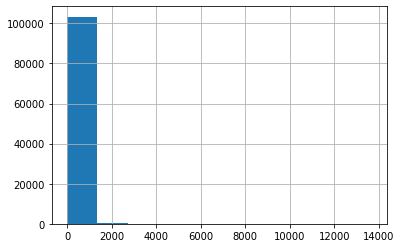

In [68]:
payments_data['payment_value'].hist(bins=10)

<AxesSubplot:>

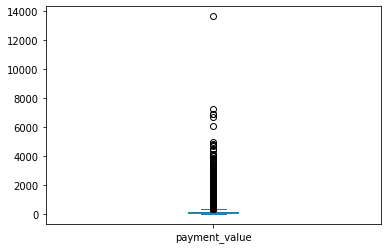

In [69]:
payments_data['payment_value'].plot.box()

**will take mean and median values both, min and max also, because why not**

### Merge payments data with bookings_data_unqiue_for_each_id

In [70]:
bookings_data_payments_data_unqiue_for_each_id = pd.merge(payments_data_unqiue_for_each_id, bookings_data_unqiue_for_each_id, on = 'booking_id', how = 'left')
bookings_data_payments_data_unqiue_for_each_id.head()

,booking_id,payment_type_mode,payment_type_count,payment_type_unique,payment_sequential_min,payment_sequential_max,payment_sequential_mean,payment_sequential_count,payment_sequential_sum,payment_installments_min,...,hotel_description_length_sum,hotel_photos_qty_min,hotel_photos_qty_max,hotel_photos_qty_mean,hotel_photos_qty_count,hotel_photos_qty_sum,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,00020b5bc201756cad655783aa166514,credit_card,1,[credit_card],1,1,1.0,1,1,1,...,338.0,3.0,3.0,3.0,1.0,3.0,2018-02-09 14:10:50,2018-02-09 14:10:50,1.0,1.0
1,00025a261e572c2a9fc158e005414df7,credit_card,1,[credit_card],1,1,1.0,1,1,2,...,1313.0,1.0,1.0,1.0,1.0,1.0,2017-05-22 18:02:34,2017-05-22 18:02:34,1.0,1.0
2,00035456e8e57cbcf89cdf7268c63976,credit_card,1,[credit_card],1,1,1.0,1,1,5,...,463.0,2.0,2.0,2.0,1.0,2.0,2018-05-16 11:51:37,2018-05-16 11:51:37,1.0,1.0
3,00045d86380d5b014642fbc4994b99a0,credit_card,1,[credit_card],1,1,1.0,1,1,8,...,814.0,1.0,1.0,1.0,2.0,2.0,2018-07-03 12:50:17,2018-07-03 12:50:17,2.0,2.0
4,0004ed7b4b20bb24c1eeb5871a6f9a16,credit_card,1,[credit_card],1,1,1.0,1,1,1,...,273.0,1.0,1.0,1.0,1.0,1.0,2018-06-21 20:16:27,2018-06-21 20:16:27,1.0,1.0


In [71]:
bookings_data_payments_data_unqiue_for_each_id.shape

(99440, 58)

### Merge two big ones finally


In [72]:
final_data = pd.merge(bookings_customer_data_unqiue_for_each_id, bookings_data_payments_data_unqiue_for_each_id, on = 'booking_id', how = 'left')
final_data.head()

,booking_id,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country,payment_type_mode,payment_type_count,payment_type_unique,...,hotel_description_length_sum,hotel_photos_qty_min,hotel_photos_qty_max,hotel_photos_qty_mean,hotel_photos_qty_count,hotel_photos_qty_sum,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,c54678b7cc49136f2d6af7e481f51cbd,51297304e76186b10a928d9ef432eb62,completed,2007-10-05 10:39:33,2007-10-05 10:50:15,2007-10-13 21:08:13,Vietnam,voucher,3.0,"[credit_card, voucher]",...,268.0,4.0,4.0,4.0,1.0,4.0,2017-10-06 11:07:15,2017-10-06 11:07:15,1.0,1.0
1,c7dce0b6741e215027345153cdb2fc8b,7a6c6d20dea0b8c802d7efb0830fb474,completed,2008-07-26 20:24:37,2008-07-28 03:07:27,2008-08-09 15:10:45,Portugal,gift_card,1.0,[gift_card],...,178.0,1.0,1.0,1.0,1.0,1.0,2018-07-30 03:24:27,2018-07-30 03:24:27,1.0,1.0
2,d0c44946d9cf07ec65d47770eb9100c2,bf3443c3d931a36708941ce2a54c0b03,completed,2008-08-10 08:21:49,2008-08-10 08:38:23,2008-08-19 17:49:29,Portugal,credit_card,1.0,[credit_card],...,232.0,1.0,1.0,1.0,1.0,1.0,2018-08-13 08:55:23,2018-08-13 08:55:23,1.0,1.0
3,e918fe9c16f97b45f8a949d5b44dbf5d,20adcdbec7375364d82f88197465ea79,completed,2007-11-21 19:11:06,2007-11-21 19:28:59,2007-12-05 00:11:42,Portugal,credit_card,1.0,[credit_card],...,468.0,3.0,3.0,3.0,1.0,3.0,2017-11-23 19:45:59,2017-11-23 19:45:59,1.0,1.0
4,e6cb83a9ceb5573f8159ad21c59c0840,ea8866dbdbc4fb7aad2c8ab97904e6da,completed,2008-02-16 21:01:39,2008-02-16 22:03:29,2008-02-19 18:00:02,Spain,credit_card,1.0,[credit_card],...,316.0,4.0,4.0,4.0,1.0,4.0,2018-02-19 20:31:37,2018-02-19 20:31:37,1.0,1.0


In [73]:
final_data.shape

(99441, 64)

### Train data

In [74]:
train_data.head(2)
train_data['set'] = 'training'
train_data.shape

(50000, 3)

### Sample Submission

In [75]:
sample_submission.head(2)
sample_submission['set'] = 'testing'
sample_submission.shape

(49079, 3)

### Make a single dataframe of train and test for easier feature engineering

In [76]:
train_data.head(2)

,booking_id,rating_score,set
0,87114b39712e6da79b0a377eb73fc7af,4,training
1,81e283fa7e4f11123a3fb894f18e6bfb,5,training


In [77]:
train_data_merged = pd.merge(train_data, final_data, on = 'booking_id', how = 'left')
train_data_merged.head(2)

,booking_id,rating_score,set,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country,payment_type_mode,...,hotel_description_length_sum,hotel_photos_qty_min,hotel_photos_qty_max,hotel_photos_qty_mean,hotel_photos_qty_count,hotel_photos_qty_sum,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,87114b39712e6da79b0a377eb73fc7af,4,training,6f807e993532d44626329010441dcb10,completed,2008-01-14 15:13:49,2008-01-14 15:30:59,2008-01-20 18:25:41,Spain,credit_card,...,1716.0,1.0,1.0,1.0,2.0,2.0,2018-01-18 15:47:59,2018-01-18 15:47:59,2.0,2.0
1,81e283fa7e4f11123a3fb894f18e6bfb,5,training,33ca0d44534a156a52a8e33a835986b3,completed,2008-02-13 10:42:03,2008-02-13 15:31:21,2008-03-02 16:16:35,Cambodia,credit_card,...,562.0,5.0,5.0,5.0,1.0,5.0,2018-02-15 15:48:21,2018-02-15 15:48:21,1.0,1.0


In [78]:
train_data_merged.shape

(50000, 66)

In [79]:
test_data_merged = pd.merge(sample_submission, final_data, on = 'booking_id', how = 'left')
test_data_merged.head(2)

,booking_id,rating_score,set,customer_id,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country,payment_type_mode,...,hotel_description_length_sum,hotel_photos_qty_min,hotel_photos_qty_max,hotel_photos_qty_mean,hotel_photos_qty_count,hotel_photos_qty_sum,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,796b98fdf73dbeba33a548910a1c6147,5,testing,531e4dc76bd6d853e68a2e7ef9053dea,completed,2008-03-02 12:08:19,2008-03-02 12:31:39,2008-03-11 23:00:20,Japan,credit_card,...,493.0,1.0,1.0,1.0,1.0,1.0,2018-03-06 12:48:39,2018-03-06 12:48:39,1.0,1.0
1,b201a9f2ecdecbb34bed034bf9e4b658,5,testing,6544df5b7b87a48208690febe226dfed,completed,2008-02-06 09:39:22,2008-02-06 10:16:41,2008-02-19 17:11:48,Portugal,credit_card,...,1893.0,1.0,1.0,1.0,1.0,1.0,2018-02-08 10:31:15,2018-02-08 10:31:15,1.0,1.0


In [80]:
test_data_merged.shape, sample_submission.shape

((49079, 66), (49079, 3))

In [81]:
train_data_merged.columns == test_data_merged.columns
# all in correct order

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [82]:
full_data = pd.concat([train_data_merged, test_data_merged], axis=0)
full_data.shape

(99079, 66)

**Write to memory**

In [83]:
full_data.to_csv('full_data.csv',index=False)